# Project 2 - Data Science Workflow

This is the submission of: [list name/s here]

"We worked on this assignment alone.”

In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"     # to keep all output without use of print()

## PART 2: GET THE DATA

In [301]:
# Task 2a

df = pd.read_csv("Telco-Customer-Churn.csv")

In [302]:
# Task 2b



In [303]:
# Task 2c



## PART 3: DATA CLEANING 

In [304]:
# Task 3a



In [305]:
# Task 3b



In [306]:
# Task 3c



In [307]:
# Task 3d



In [308]:
# Task 3e



In [309]:
# Task 3f



In [310]:
# Task 3g



In [311]:
# Task 3h



In [312]:
# Task 3i



In [313]:
# Task 3j



In [314]:
# Task 3k



In [315]:
# Task 3l



In [316]:
# Task 3m



In [317]:
# Task 3n



## PART 4: DATA EXPLORATION 

In [318]:
# Task 4a

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0.0,No,Yes,22.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0.0,No,No,10.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


In [319]:
# Task 4b



In [320]:
# Task 4c



In [321]:
# Task 4d



In [322]:
# Task 4f



In [323]:
# Task #4g



In [324]:
# Task 4h



In [325]:
# Task 4i



## PART 5: DATA TRANSFORMATION 

100.0

74

100.0

<Figure size 7200x720 with 0 Axes>

[Text(0, 0, 'zero'), Text(50, 0, 'middle'), Text(100, 0, 'max')]

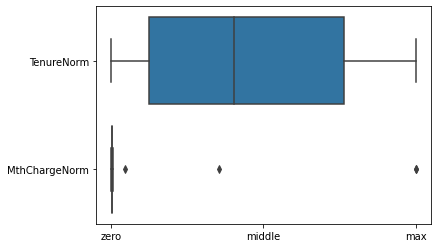

<Figure size 7200x720 with 0 Axes>

In [326]:
# Task 5a


fnc = lambda x: (x - min(x)) / (max(x) - min(x)) * 100

df[['TenureNorm', 'MthChargeNorm']] = round(df[['tenure', 'MonthlyCharges']].apply(fnc, axis=0),2)
df['TenureNorm'].max()
len(pd.unique(df['TenureNorm']))
df['MthChargeNorm'].max()


ax = sns.boxplot(data = df[['TenureNorm', 'MthChargeNorm']], orient="h")
#fig, ax = plt.subplots()
plt.figure(figsize = [100, 10])
ax.set_xticks([0,50,100])
ax.set_xticklabels(['zero', 'middle','max'])
plt.show()

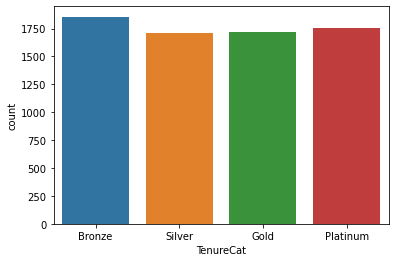

customerID            object
gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
TenureCat           category
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
TenureNorm           float64
MthChargeNorm        float64
dtype: object

In [327]:
# Task 5b

df['TenureCat'] = pd.qcut(df.tenure, q=4,labels=['Bronze','Silver','Gold','Platinum'])
ax = sns.countplot(data = df, x = "TenureCat")
plt.show()

idx = df.columns.get_loc('tenure')
first_column = df.pop('TenureCat')
df.insert(idx + 1, 'TenureCat', first_column)

df.drop('tenure', inplace=True, axis=1)

df.dtypes

In [328]:
# Task 5c

s = df.groupby(by = df['TenureCat'])
s[['TenureCat']].count()

,TenureCat
TenureCat,
Bronze,1856
Silver,1714
Gold,1721
Platinum,1754


In [329]:
# Task 5d
s = df.groupby([df['InternetService'], df['TenureCat']])
s[['MonthlyCharges']].mean()

MonthlyCharges
InternetService TenureCat                
DSL             Bronze          47.886364
                Silver          54.345139
                Gold            60.255660
                Platinum        82.453778
Fiber optic     Bronze          81.273380
                Silver          87.951771
                Gold            95.472407
                Platinum       102.080798
No              Bronze          72.261593
                Silver          20.779104
                Gold            83.746901
                Platinum        22.353382

In [330]:
# Task 5e
s = df.groupby([df['TenureCat'], df['Contract']])
s[['MonthlyCharges']].mean().round(2)


MonthlyCharges
TenureCat Contract                      
Bronze    Month-to-month           70.21
          One year                 31.14
          Two year                 33.03
Silver    Month-to-month           68.12
          One year                 47.22
          Two year                 31.86
Gold      Month-to-month           79.84
          One year                103.56
          Two year                 48.30
Platinum  Month-to-month           89.01
          One year                 82.50
          Two year                 76.90

## PART 8: FEATURE ENGINEERING

In [331]:
# Task 8a
def techsavvy(dfRow):
    if (dfRow['OnlineSecurity'] == 'Yes') and (dfRow['OnlineBackup'] == 'Yes') and (dfRow['InternetService'] == 'Fiber optic'):
        return 'high'
    elif (dfRow['OnlineSecurity'] == 'Yes') and (dfRow['OnlineBackup'] == 'No') and (dfRow['InternetService'] == 'Fiber optic'):
        return 'medium'
    elif dfRow['InternetService'] == 'No':
        return 'UK'
    else:
        return 'low'

df['Techsavvy'] = df.apply(techsavvy, axis=1)

s = df.groupby(df['Techsavvy'])
s[['Techsavvy']].count()

df = df[df.Techsavvy != 'UK']

data_types_dict = {'Techsavvy': 'category'}
df = df.astype(data_types_dict)


df.drop('OnlineSecurity', inplace=True, axis=1)
df.drop('OnlineBackup', inplace=True, axis=1)
df.dtypes


,Techsavvy
Techsavvy,
UK,1525
high,488
low,4683
medium,350


customerID            object
gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
TenureCat           category
PhoneService          object
MultipleLines         object
InternetService       object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
TenureNorm           float64
MthChargeNorm        float64
Techsavvy           category
dtype: object

In [332]:
# Task 8b
def streamer(dfRow):
    if (dfRow['StreamingTV'] == 'Yes') and (dfRow['StreamingMovies'] == 'Yes'):
        return 'streamer'
    elif (dfRow['StreamingTV'] == 'No internet service') and (dfRow['StreamingMovies'] == 'No internet service'):
        return 'UK'
    else:
        return 'non-streamer'

df['Streamer'] = df.apply(streamer, axis=1)
df = df[df.Streamer != 'UK']

data_types_dict = {'Streamer': 'category'}
df = df.astype(data_types_dict)


df.drop('InternetService', inplace=True, axis=1)
df.drop('StreamingTV', inplace=True, axis=1)
df.drop('StreamingMovies', inplace=True, axis=1)
df.dtypes

s = df.groupby(df['Streamer'])
s[['Streamer']].count()



customerID            object
gender                object
SeniorCitizen        float64
Partner               object
Dependents            object
TenureCat           category
PhoneService          object
MultipleLines         object
DeviceProtection      object
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges          object
Churn                 object
TenureNorm           float64
MthChargeNorm        float64
Techsavvy           category
Streamer            category
dtype: object

,Streamer
Streamer,
non-streamer,3583
streamer,1937


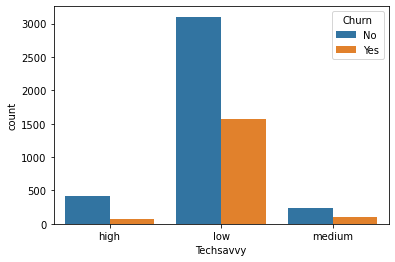

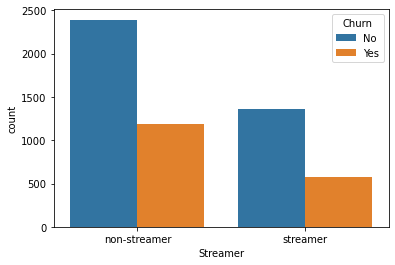

In [333]:
# Task 8c
ax = sns.countplot(data = df, x = 'Techsavvy', hue = 'Churn')
plt.show()

ax2 = sns.countplot(data = df, x = 'Streamer', hue = 'Churn')
plt.show()


In [338]:
# Task 8d
def dummychurn(dfRow):
    if dfRow['Churn'] == 'Yes':
        return 1
    else:
        return 0

df['Churn'] = df.apply(dummychurn, axis=1)


dummies = pd.get_dummies(df[['Streamer', 'Techsavvy', 'TenureCat', 'PaymentMethod']])

df2 = pd.concat([dummies, df['Churn'], df['MonthlyCharges']], axis=1)
df2

,Streamer_non-streamer,Streamer_streamer,Techsavvy_high,Techsavvy_low,Techsavvy_medium,TenureCat_Bronze,TenureCat_Silver,TenureCat_Gold,TenureCat_Platinum,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,MonthlyCharges
0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,29.85
1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,56.95
2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,42.30
3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,89.10
4,1,0,0,1,0,0,1,0,0,0,0,0,1,0,29.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7041,1,0,0,1,0,0,1,0,0,0,0,1,0,0,59.80
7042,1,0,0,1,0,1,0,0,0,1,0,0,0,0,44.20
7043,1,0,0,1,0,1,0,0,0,0,0,1,0,0,75.75
7044,1,0,1,0,0,0,0,0,1,0,1,0,0,0,102.95


## PART 9: FEATURE SELECT & FEATURE IMPORTANCE

## PART 10: MODELING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


